In [67]:
import pymc3 as pm
import numpy as np

In [75]:
r = list(range(2, 15))
lowers = np.zeros(shape=len(r))
uppers = np.zeros(shape=len(r))
for i, size in enumerate(r):
    data = np.random.normal(loc=100, scale=1, size=size)
    with pm.Model() as model:
        mu = pm.Uniform('mu', -1000, 1000)  # Really uninformative priors
        sig = pm.Uniform('sigma', 0, 100)

        like = pm.Normal('likelihood', mu=mu, sd=sig, observed=data)

        trace = pm.sample(2000, start=pm.find_MAP(), step=pm.NUTS())
        
        lower, upper = np.percentile(trace.mu, [2.5, 97.5])
        
    lowers[i] = lower
    uppers[i] = upper

Applied interval-transform to mu and added transformed mu_interval_ to model.
Applied interval-transform to sigma and added transformed sigma_interval_ to model.
 [-----------------100%-----------------] 2000 of 2000 complete in 3.2 secApplied interval-transform to mu and added transformed mu_interval_ to model.
Applied interval-transform to sigma and added transformed sigma_interval_ to model.
 [-----------------100%-----------------] 2000 of 2000 complete in 5.4 secApplied interval-transform to mu and added transformed mu_interval_ to model.
Applied interval-transform to sigma and added transformed sigma_interval_ to model.
 [-----------------100%-----------------] 2000 of 2000 complete in 9.1 secApplied interval-transform to mu and added transformed mu_interval_ to model.
Applied interval-transform to sigma and added transformed sigma_interval_ to model.
 [-----------------100%-----------------] 2000 of 2000 complete in 13.5 secApplied interval-transform to mu and added transformed 

In [76]:
lowers

array([ 20.25101867,  83.30474709,  93.23889105,  99.14807261,
        98.75842077,  97.00562841,  99.12424288,  99.06295667,
        99.10656553,  99.18848583,  99.30002741,  99.24151903,  99.45787664])

In [77]:
uppers

array([ 192.77864383,  123.61322512,  106.16145306,  102.16755721,
        101.42020753,  101.68228056,  101.06385998,  100.70676635,
        100.86803101,  100.36283363,  100.89139626,  100.31846923,
        100.65917798])

In [78]:
uppers - lowers

array([ 172.52762516,   40.30847803,   12.92256201,    3.01948459,
          2.66178675,    4.67665215,    1.9396171 ,    1.64380968,
          1.76146548,    1.1743478 ,    1.59136885,    1.0769502 ,
          1.20130135])

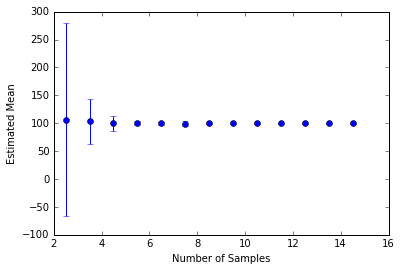

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.bar(np.arange(len(uppers))+2, (uppers + lowers) / 2)
plt.errorbar(np.arange(len(uppers))+2.5, (uppers + lowers) / 2, yerr=(uppers - lowers), marker='o', ls='none')
plt.ylabel('Estimated Mean')
plt.xlabel('Number of Samples')
# plt.xlim(2, len(uppers)+2)
# plt.yscale('log')
# plt.ylim(0, 20)

How to decide how many samples? When does the 95% HPD converge? When is the HPD width some percentage? Is this a qualitative, rather than quantitative decision?